In [1]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
media_df = pd.read_csv('Data/mediacompany.csv')

In [3]:
media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
sum(media_df.duplicated(subset = 'Date')) == 0

True

In [5]:
media = media_df.drop('Unnamed: 7', axis =1)

In [6]:
#note that I just changed the name of the DataFrame

media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [7]:
media.shape

(80, 7)

In [8]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [9]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [10]:
media.shape[0]

80

In [11]:
media.isnull().sum()*100/media.shape[0]

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

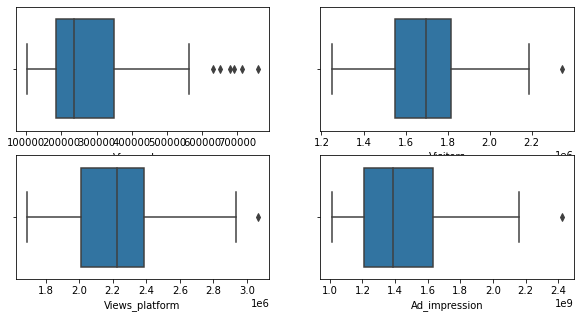

In [12]:
#looking at outliners

fig,axs = plt.subplots(2,2,figsize = (10,5))

plt1 = sns.boxplot(media['Views_show'], ax = axs [0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs [0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs [1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs [1,1])

plt.show()

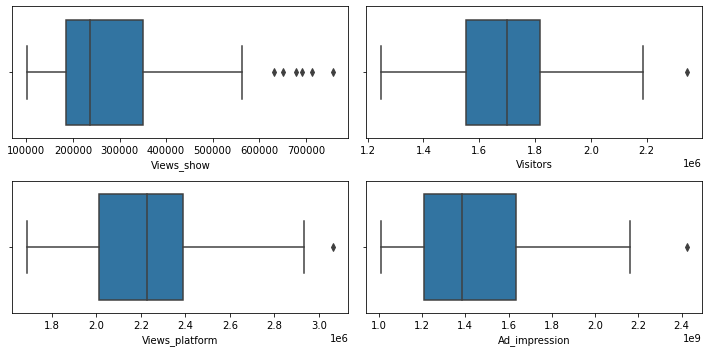

In [13]:


fig,axs = plt.subplots(2,2,figsize = (10,5))

plt1 = sns.boxplot(media['Views_show'], ax = axs [0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs [0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs [1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs [1,1])

plt.tight_layout()

In [14]:
#Data prep
#Convertin date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'], dayfirst = False )
# Date is in the format YYYY-MM-DD

In [15]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [16]:
#Getting day of the week from date
media['DOW'] = media['Date'].dt.dayofweek
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DOW
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


In [17]:
media.shape

(80, 8)

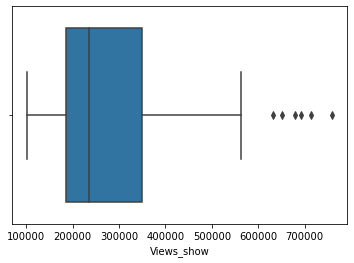

In [18]:
#Target variable
#View Show
sns.boxplot(media['Views_show'])

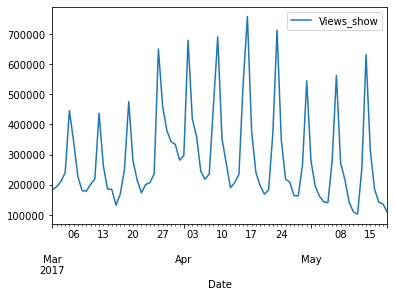

In [19]:
media.plot.line(x='Date', y='Views_show')

In [20]:
#Interference
#we can observe a pattern in the plot

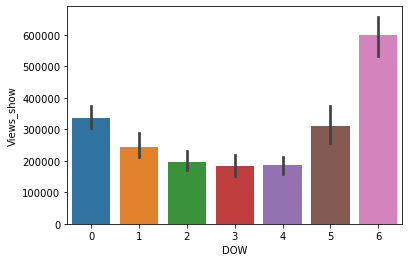

In [21]:
#Day of Week
sns.barplot(data = media, x='DOW', y='Views_show')

In [22]:
#we can see that Views are more on Saturday and Sunday and decline on other days

#Hence we can think of another matrix "Weekend", that is 1 for weekend and 0 for weekdays

In [23]:
di = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['DOW'].map(di)

In [24]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DOW,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


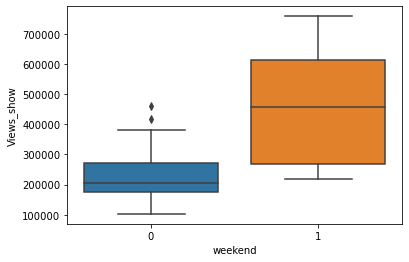

In [25]:
sns.boxplot(data = media, x= 'weekend', y = 'Views_show')

In [26]:
# a bunch more people watch the show on the weekends

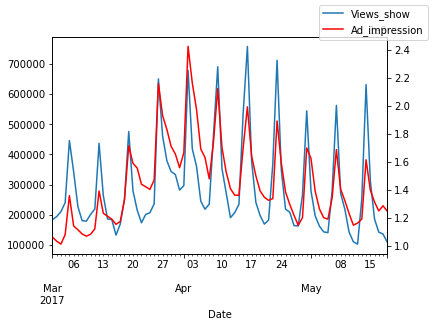

In [27]:
# plot for Date vs Views_show and days vs Ad_impression

ax = media.plot(x='Date', y = 'Views_show', legend=False)
ax2 =  ax.twinx()

media.plot(x = 'Date', y = 'Ad_impression', ax=ax2, legend=False, color ='r')
ax.figure.legend()

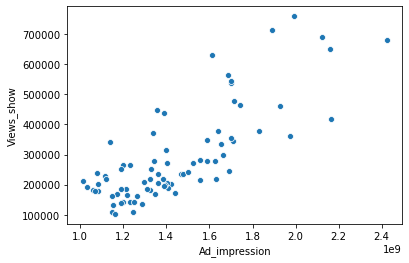

In [28]:
sns.scatterplot(data = media, x ='Ad_impression', y = 'Views_show')

In [29]:
# obviously there is a weekly pattern fro both and a coorelation

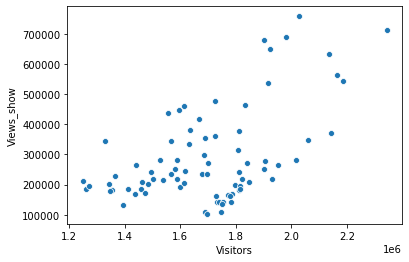

In [30]:
sns.scatterplot(data=media, x = 'Visitors', y = 'Views_show')

In [31]:
# Inference: Show views are somewhat proportionately related to visitors

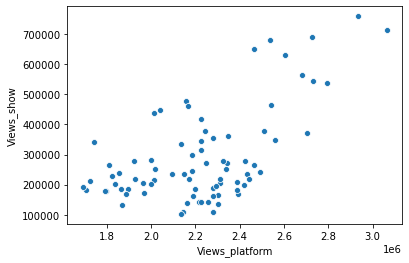

In [32]:
#Platform views
sns.scatterplot(data = media, x = 'Views_platform', y = 'Views_show')

In [33]:
# Inference: Show views are somewhat proportionately related to platform views

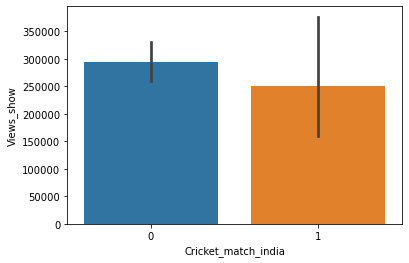

In [34]:
#Cricket match
sns.barplot(data = media, x = 'Cricket_match_india', y = 'Views_show')

In [35]:
#Inference: Show views increase slighly when there is no cricket match

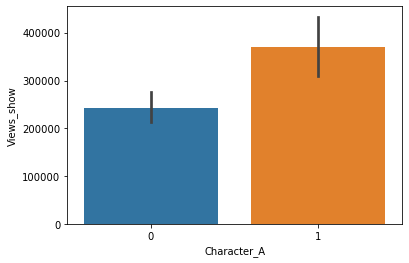

In [36]:
#Character A
sns.barplot(data = media, x = 'Character_A', y = 'Views_show')

In [37]:
#Inference: Show views increase slighly wheCharacter A is there

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']

media[num_vars] = scaler.fit_transform(media[num_vars])

In [41]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DOW,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1


In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

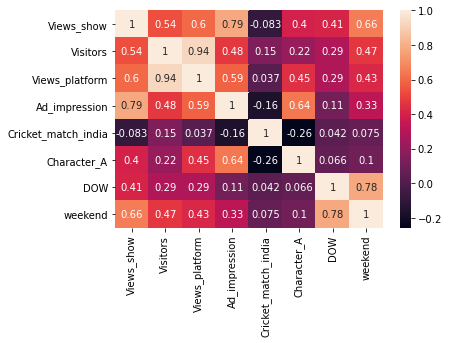

In [43]:
sns.heatmap(media.corr(), annot = True)

In [44]:
# Putting feature variable to X
X = media[['Visitors', 'weekend']]

#Putting response variable to y
y = media['Views_show']

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
import statsmodels.api as sm

In [49]:
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 

X = sm.add_constant(X)

# create a fitted model in one line

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           2.51e-12
Time:                        04:25:00   Log-Likelihood:                 30.210
No. Observations:                  80   AIC:                            -54.42
Df Residuals:                      77   BIC:                            -47.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0770      0.042      1.826      0.0

In [50]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [51]:
X = sm.add_constant(X)

# create a fitted model in one line

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.53e-14
Time:                        04:28:24   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      

In [52]:
# we have seen that views of today effects views of tomorrow. So to take that in account we will create a Lag variable.

In [53]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DOW,weekend,Lag_Views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.009817
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


In [54]:
media.Lag_Views[0] = 0

<ipython-input-54-ed4fd0b97d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media.Lag_Views[0] = 0


In [55]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DOW,weekend,Lag_Views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.000000
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


In [56]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [57]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     54.94
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.48e-21
Time:                        04:34:43   Log-Likelihood:                 57.207
No. Observations:                  80   AIC:                            -104.4
Df Residuals:                      75   BIC:                            -92.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0149      0.032     -0.460      

In [58]:
# Inference:
# It leaves visitor insignificant.

# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [59]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           3.59e-15
Time:                        04:42:24   Log-Likelihood:                 39.264
No. Observations:                  80   AIC:                            -70.53
Df Residuals:                      76   BIC:                            -61.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0485      0.036      1.

In [60]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = media['Views_show']

In [61]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.53e-14
Time:                        04:46:46   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      

In [62]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [63]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.10e-25
Time:                        04:47:16   Log-Likelihood:                 67.431
No. Observations:                  80   AIC:                            -124.9
Df Residuals:                      75   BIC:                            -113.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0064      0.028     -0.229

In [64]:
# Inference
# we can observe a pattern in the plot.

In [65]:
# Putting feature variable to X
X = media[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [66]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.05e-26
Time:                        04:48:10   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.021     -0.015

In [67]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

In [68]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [69]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.02e-25
Time:                        04:48:58   Log-Likelihood:                 67.508
No. Observations:                  80   AIC:                            -125.0
Df Residuals:                      75   BIC:                            -113.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [70]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [71]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.05e-26
Time:                        04:49:26   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [72]:
# Making predictions using the model
X = media[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_9.predict(X)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [74]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.01086608843364618
r_square_value : 0.802643446857565


Text(0, 0.5, 'Views')

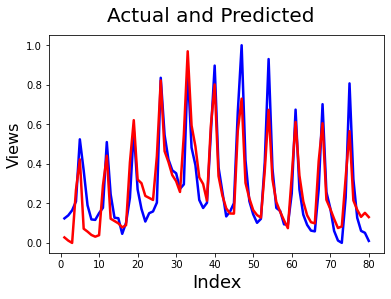

In [75]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

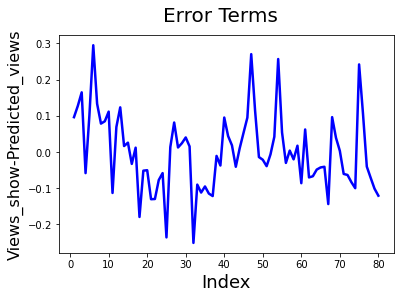

In [76]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [77]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_5.predict(X)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [79]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.022801047640331872
r_square_value : 0.585873408097934


Text(0, 0.5, 'Views')

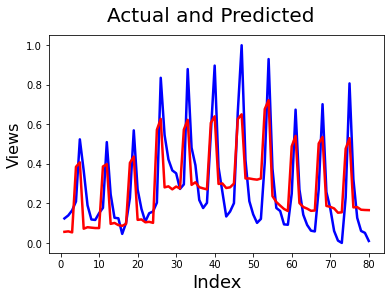

In [80]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

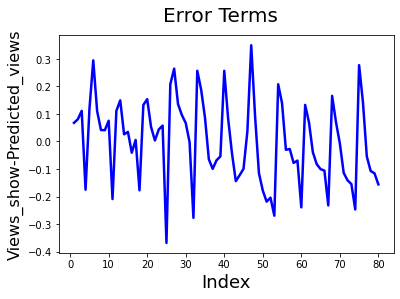

In [81]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [82]:
'''Ad Impressions and Character A as the driver variables that could explain the viewership pattern. Based on industry experience, ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly, Character A’s absence and presence created a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership.'''

'Ad Impressions and Character A as the driver variables that could explain the viewership pattern. Based on industry experience, ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly, Character A’s absence and presence created a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership.'